# Anomaly Detection using classifiers
Some supervised learning algorithms can be used for anomaly detection.
So this is brief introduction (just a code snippet) to other two popular methods that you can use both for novelty detection and outlier detection: we'll see Isolation Forest and One-Class SVM.
These algorithms are better suited for novelty detection but usually work well for anomaly detection too.
Anyway, here we will focus on novelty detection.

## Let's generate some artificial data
This artificial data are simulated from a mixture of a bivariate gaussian + uniform. Thus, they are coming from two different data generation processes.

*HINT*: You can try with different parameters for the data generation probability distribution and see how it works (I repeat: you are strongly encouraged to use artificial data to understand how a model behaves).

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(50)

# Generate inliers = train data 
X = 0.25 * rng.randn(1000, 2)
X_train = np.r_[X + 1, X - 2]

# Generate regular (inliers) novel observations
X = 0.25 * rng.randn(70, 2)
X_test = np.r_[X + 1, X - 2]
# Generate some anomalies, i.e. abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(30, 2))


## Isolation Forest ##
IsolationForest is essentially a randomised Random Forest, ie **an ensemble learning anomaly detection algorithm**.

The algorithm basically works as follows:
- It creates a Random Forest in which trees are grown randomly: at each node, features are picked randomly, and it picks a random threshold value to split the dataset into two;
- It continues to chop away the dataset until all instances end up being isolated from each other;
- An anomaly is typically far away from other instances => on average, across all the trees, it becomes isolated in less steps that normal instances.

It is especially good at detecting outliers in high dimensional datasets.

The most important hyperparameter in the algorithm is probably the **contamination parameter**, which is used to help estimate the proportion (or probability) of abnormal values in the dataset. This parameter is a scalar value between 0.0 and 0.5 and by default ("auto") is set to 0.1 (so try different values). It can be tuned, of course, like any hyperparameter. 

The algorithm returns the **anomaly score** of the input samples - kind of probability.

Let's se Isolation Forest in action:

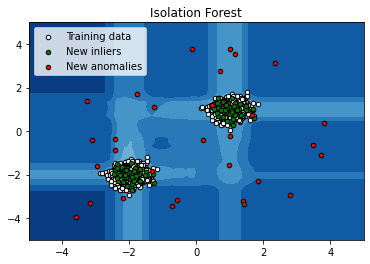

In [62]:
# fit the Forest
clf = IsolationForest(max_samples=200, contamination=0.0, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Isolation Forest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=20, edgecolor="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="green", s=20, edgecolor="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="red", s=20, edgecolor="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [b1, b2, c],
    ["Training data", "New inliers", "New anomalies"],
    loc="upper left",
)
plt.show()
    

## One-class Support Vector Machines ##
SVMs are also widely used for anomaly detection. Kernelized SVM can build an effective limiting hyperplane, which will separate the normal points from the outliers.
This algorithm works well with high-dimensional or sparse data, typically on small and medium-sized datasets.

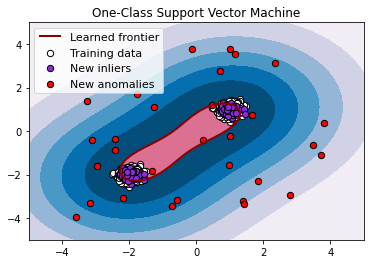

In [60]:
from sklearn import svm

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size


import matplotlib.font_manager

# plot
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("One-Class Support Vector Machine")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="red", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "Learned frontier",
        "Training data",
        "New inliers",
        "New anomalies",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)

plt.show()